Counter({6: 22, 1: 22, 4: 20, 3: 20, 9: 18, 5: 17, 2: 17, 10: 15, 7: 15, 8: 13, 15: 4, 13: 4, 21: 2, 19: 2, 18: 2, 14: 2, 12: 2, 100: 1, 49: 1, 41: 1, 40: 1, 25: 1, 16: 1, 11: 1})
range(0, 101)
[0, 22, 17, 20, 20, 17, 22, 15, 13, 18, 15, 1, 2, 4, 2, 4, 1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


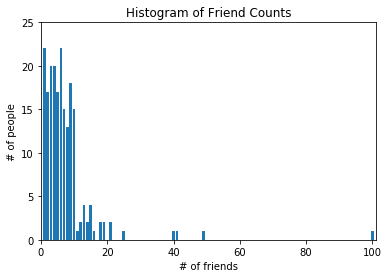

In [1]:
# statistics
from matplotlib import pyplot as plt
from collections import Counter
import math
%matplotlib inline

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

friend_counts = Counter(num_friends)
print(friend_counts)

xs = range(101)
print(xs)

ys = [ friend_counts[x] for x in xs ]
print(ys)

plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [2]:
num_points = len(num_friends)
print(num_points)

largest_value = max(num_friends)
print(largest_value)

smallest_value = min(num_friends)
print(smallest_value)

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
print(smallest_value)

second_smallest_value = sorted_values[1]
print(second_smallest_value)

second_largest_value = sorted_values[-2]
print(second_largest_value)

204
100
1
1
1
49


In [3]:
# 平均
def mean(x):
    return sum(x) / len(x)

print("Mean :", mean(num_friends))

# 中央値
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 is 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

print("Median :", median(num_friends))

# 分位数：中央値を一般化したもの
def quantile(x,p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print("Quantile 0.10:", quantile(num_friends, 0.10))
print("Quantile 0.25:", quantile(num_friends, 0.25))
print("Quantile 0.75:", quantile(num_friends, 0.75))
print("Quantile 0.90:", quantile(num_friends, 0.90))


Mean : 7.333333333333333
Median : 6.0
Quantile 0.10: 1
Quantile 0.25: 3
Quantile 0.75: 9
Quantile 0.90: 13


In [4]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [ x_i for x_i, count in counts.items() if count is max_count ]

mode(num_friends)

[6, 1]

In [5]:
# dispersion 散らばり

def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

In [6]:
# variance 分散

def de_mean(x):
    """xを変換して、xとxの平均との差とする（結果の平均が0となるように"""
    x_bar = mean(x)
    return [ x_i - x_bar for x_i in x ]

def sum_of_squares(x):
    return sum([ (x_i * x_i) for x_i in x ])

def sum_of_squares_b(x):
    ans = 0
    for x_i in x:
        ans = ans + x_i * x_i
    return ans

def variance_b(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares_b(deviations) / (n - 1)
    
print(variance_b(num_friends))

def variance(x):
    """xには、値が少なくとも2つあることを前提とする"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716


81.54351395730716

In [7]:
# 標準偏差

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [8]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

In [14]:
# covariance 共分散
from numpy import dot

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x,y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573054

In [15]:
# correlation 相関係数

def correlation(x,y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0 #変動が無ければ相関は0
    
correlation(num_friends, daily_minutes)

0.24736957366478204

In [17]:
# outlier 外れ値

outlier = num_friends.index(100)

num_friends_good = [ x for i, x in enumerate(num_friends) if i != outlier ]
daily_minutes_good = [ x for i, x in enumerate(daily_minutes) if i != outlier ]

correlation(num_friends_good, daily_minutes_good)

0.57367921156655777